In [1]:
%matplotlib inline

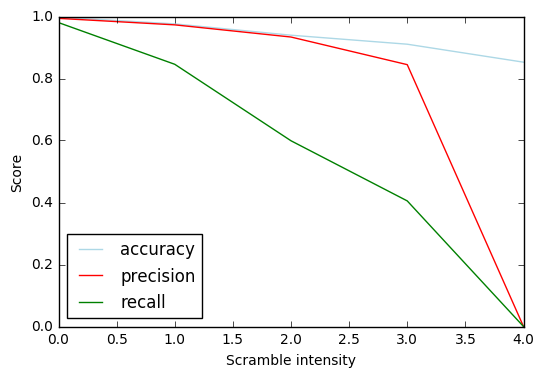

In [2]:
import matplotlib.pyplot as plt
from utils import get_saved_data, get_binetflow_files, get_feature_labels
from binet_keras import keras_train_and_test
import random


binet_files = get_binetflow_files()
best = [8, 9, 12]
summaries = []
for i in best:
    summaries += get_saved_data(0.15, binet_files[i])

scores = []
prec = []
rec = []
feature, label = get_feature_labels(summaries)
# normal score
acc, p, r = keras_train_and_test(feature, label)
scores.append(acc)
prec.append(p)
rec.append(r)

# blur the data a bit, make it stronger each iteration
for i in range(1, 5):
    indices = [random.randrange(len(feature)) for _ in range(int(len(feature) * ((i*10)/100)))]
    feats = feature[:]
    for index in indices: 
        feats[index]  = [random.randrange(100) for _ in range(len(feats[index]))]
    acc, p, r = keras_train_and_test(feats, label)
    scores.append(acc)
    prec.append(p)
    rec.append(r)

plt.figure()
plt.plot(scores, "lightblue", label="accuracy")
plt.plot(prec, color="red", label="precision")
plt.plot(rec, color="green", label="recall")
plt.xlabel("Scramble intensity")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [3]:
print("Accuracy scores:", *scores)
print("precision scores:", *prec)
print("recall scores:", *rec)

Accuracy scores: 0.997941531447 0.976076170042 0.939670779134 0.910630950784 0.852651870725
precision scores: 0.993970761258 0.973028970535 0.933782621653 0.844686222623 0.0
recall scores: 0.980383341284 0.845839440138 0.59913505117 0.405137711894 0.0
